In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [3]:
df = pd.read_csv('../Data/5.RFM_augmented_DBSCAN.csv')
df

,customer_unique_id,order_status,payment_sequential,product_category_name_english,review_score,Frequency_x,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,7,1.0,49,4.0,2,1.303348
1,af07308b275d755c9edb36a90c618231,7,1.0,60,4.0,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,7,1.0,5,5.0,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,7,1.0,61,5.0,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,7,1.0,67,5.0,1,1.220373
...,...,...,...,...,...,...,...
95358,6359f309b166b0196dbf7ad2ac62bb5a,7,1.0,43,5.0,1,1.494089
95359,da62f9e57a76d978d02ab5362c509660,7,1.0,6,4.0,1,1.663569
95360,737520a9aad80b3fbbdad19b66b37b30,7,1.0,45,5.0,1,1.723809
95361,5097a5312c8b157bb7be58ae360ef43c,7,1.0,15,2.0,1,1.686544


In [7]:
df.drop(columns=['product_category_name_english', 'payment_sequential'], inplace=True)

In [8]:
df

,customer_unique_id,order_status,review_score,Frequency_x,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,7,4.0,2,1.303348
1,af07308b275d755c9edb36a90c618231,7,4.0,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,7,5.0,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,7,5.0,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,7,5.0,1,1.220373
...,...,...,...,...,...
95358,6359f309b166b0196dbf7ad2ac62bb5a,7,5.0,1,1.494089
95359,da62f9e57a76d978d02ab5362c509660,7,4.0,1,1.663569
95360,737520a9aad80b3fbbdad19b66b37b30,7,5.0,1,1.723809
95361,5097a5312c8b157bb7be58ae360ef43c,7,2.0,1,1.686544


In [9]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 5)

In [10]:
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 4)
(10000,)


In [11]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 4)


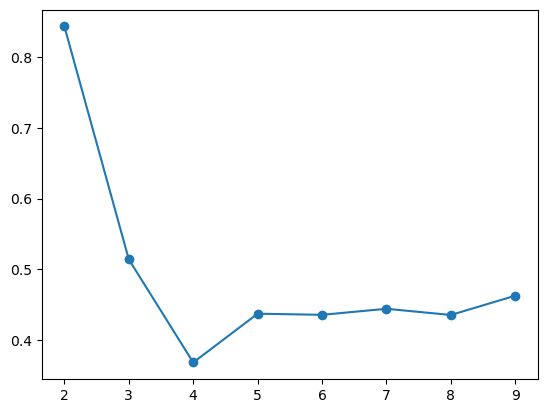

In [12]:
from sklearn import cluster, metrics

silhouettes = []
for num_clusters in range (2, 10): #on regarde de 2 à 10 clusters
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

In [13]:
from sklearn import decomposition

X = df.drop('customer_unique_id', axis=1).values
X_norm = preprocessing.scale(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.44045043 0.69085679]


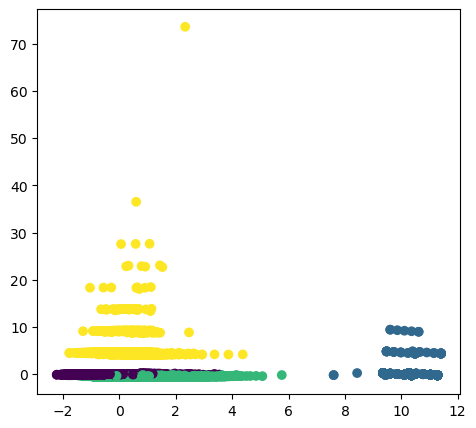

In [14]:
fig = plt.figure(figsize=(12, 5))

cls = cluster.KMeans(n_clusters=4)
cls.fit(X_norm)
ax = fig.add_subplot(121)#1 figure en ordonné, 2 figures en abscisse et on s'occupe de la première figure
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_)#on observe la première et la deuxième composante

In [15]:
from sklearn import decomposition

X = df.drop('customer_unique_id', axis=1).values
X_norm = preprocessing.scale(X)

pca = decomposition.PCA(n_components=3)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.44045043 0.69085679 0.91868195]


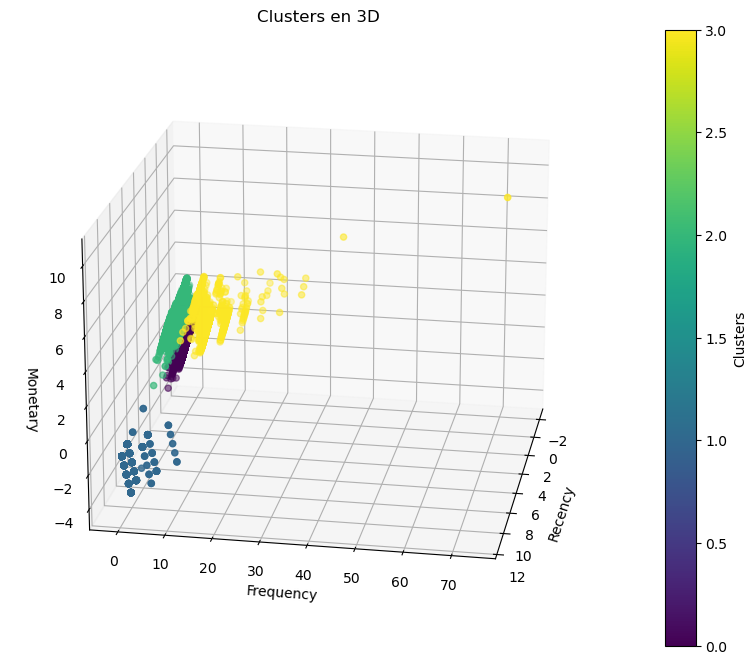

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

scatter = ax.scatter(X_trans[:, 0], X_trans[:, 1], X_trans[:, 2], c=cls.labels_, cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

In [18]:
df = pd.read_csv('../Data/5.RFM_augmented.csv')
#df.drop(columns=['product_category_name_english'], inplace=True)
df_sample = df.sample(10000, replace=False)
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 6)
(10000,)


In [19]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 6)


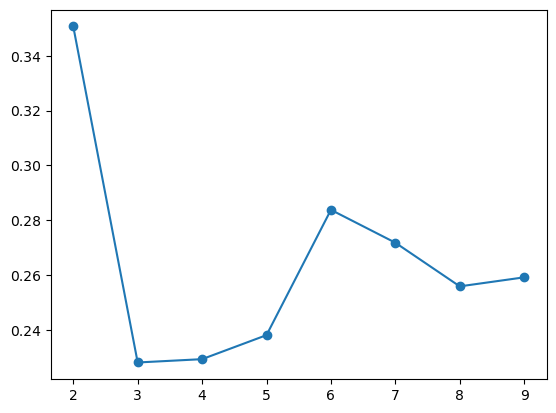

In [20]:
from sklearn import cluster, metrics

silhouettes = []
for num_clusters in range (2, 10): #on regarde de 2 à 10 clusters
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

In [21]:
from sklearn import decomposition

X = df.drop('customer_unique_id', axis=1).values
X_norm = preprocessing.scale(X)

pca = decomposition.PCA(n_components=3)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.2960729  0.46794777 0.63501829]


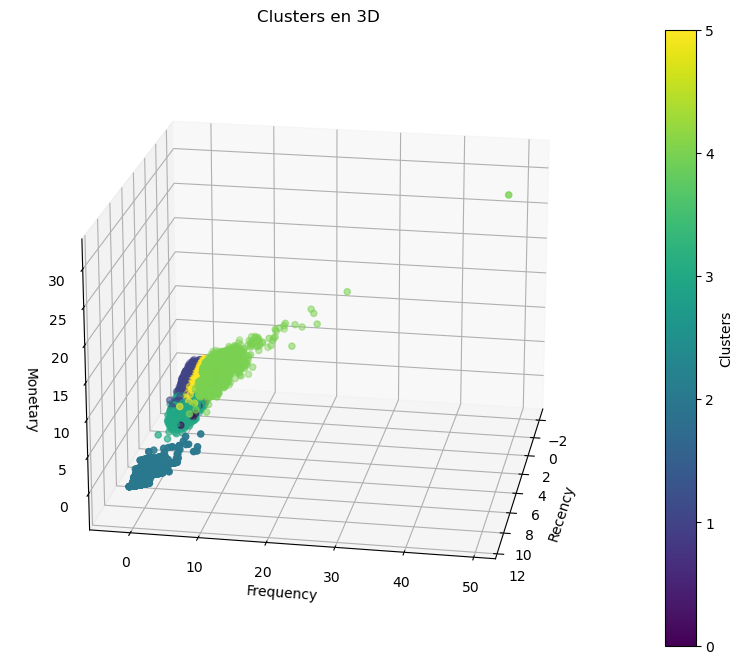

In [22]:
from mpl_toolkits.mplot3d import Axes3D

cls = cluster.KMeans(n_clusters=6)
cls.fit(X_norm)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

scatter = ax.scatter(X_trans[:, 0], X_trans[:, 1], X_trans[:, 2], c=cls.labels_, cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()